In [1]:
# Write a program to design the classification system using 
# Decision Tree Algorithm. Evaluate the model and visualize the tree.

In [2]:
# Dataset: banknotes.csv
# Location: https://mitu.co.in/dataset

### Import necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/home/mitu/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.16.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import the dataset

In [4]:
df = pd.read_csv('banknotes.csv')

In [5]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.shape

(1372, 5)

In [7]:
list(df.columns)

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [8]:
df.std()

Variance    2.842763
Skewness    5.869047
Curtosis    4.310030
Entropy     2.101013
Class       0.497103
dtype: float64

In [9]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

### Separate the input and output data

In [12]:
list(df.columns)

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [15]:
# input data
x = df.drop('Class', axis = 1)
# x.iloc[:,:4]

# output data
y = df['Class']
# y = df.iloc[:,4]

In [14]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


### Explore / Visualize the data

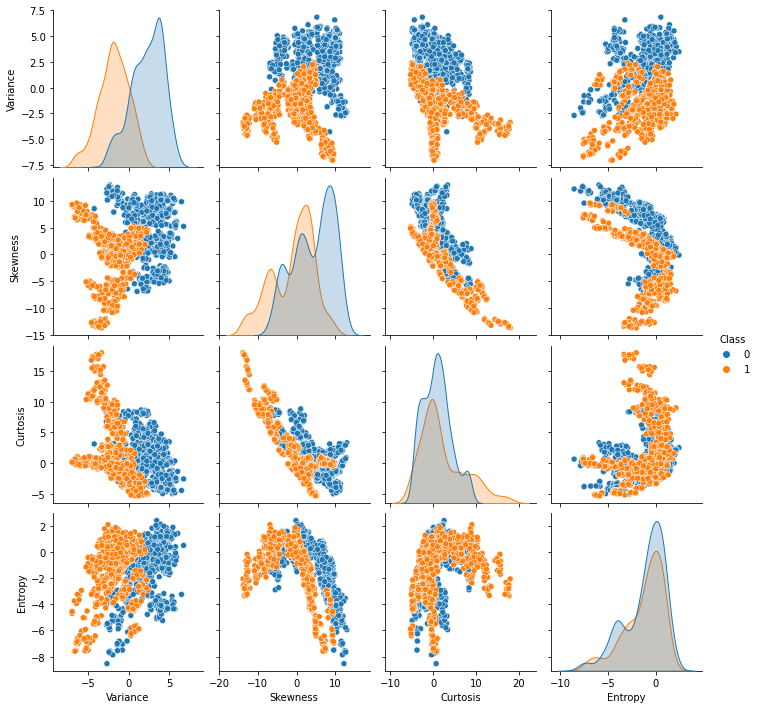

In [17]:
sns.pairplot(df, hue='Class')

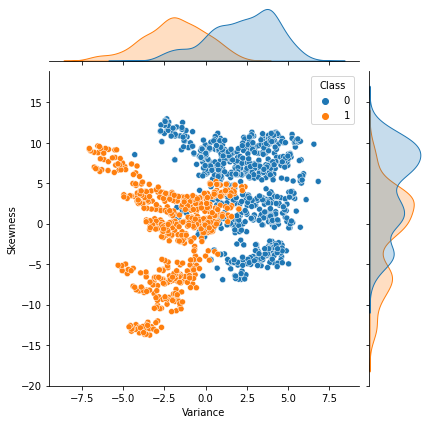

In [18]:
sns.jointplot(x='Variance', y='Skewness', data=df, hue='Class')

<AxesSubplot:xlabel='Entropy', ylabel='Density'>

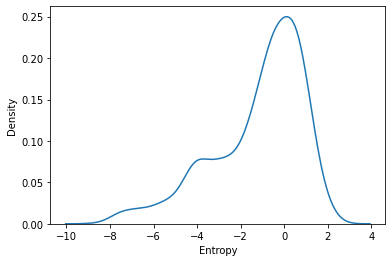

In [22]:
sns.kdeplot(df['Entropy'])

In [23]:
set(y)

{0, 1}

In [24]:
np.unique(y)

array([0, 1])

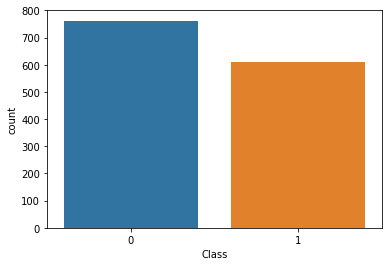

In [25]:
sns.countplot(x=y);

In [26]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [34]:
print('Class-0: ', round(y.value_counts()[0]/len(y), 2))
print('Class-1: ', round(y.value_counts()[1]/len(y), 2))

Class-0:  0.56
Class-1:  0.44


### Normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
x_scaled = scaler.fit_transform(x)

In [39]:
x_scaled

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [41]:
x_scaled[:,2].min(), x_scaled[:,2].max()

(0.0, 1.0)

In [43]:
pd.DataFrame(x_scaled, columns=x.columns).describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917
std,0.205003,0.219611,0.185669,0.191041
min,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821
50%,0.543617,0.602168,0.254280,0.723929
75%,0.711304,0.770363,0.364674,0.813171
max,1.000000,1.000000,1.000000,1.000000


### Cross-validation

In [45]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [51]:
x_train.shape

(1029, 4)

In [52]:
x_test.shape

(343, 4)

In [53]:
x_train

array([[0.7222739 , 0.84444353, 0.07108794, 0.6522091 ],
       [0.70000505, 0.91776896, 0.08127598, 0.39823781],
       [0.23688063, 0.20510988, 0.67156181, 0.81187794],
       ...,
       [0.55113976, 0.55276766, 0.1324014 , 0.78612792],
       [0.65325343, 0.50592299, 0.45046202, 0.87513753],
       [0.3581334 , 0.92032464, 0.34161156, 0.33745238]])

### Build the model

In [55]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Create the object
classifier = DecisionTreeClassifier(random_state=0)

In [57]:
# Train the algorithm
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Performance Evaluation

In [59]:
y_pred = classifier.predict(x_test)

In [60]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [61]:
result

,actual,predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [63]:
cm = confusion_matrix(y_test, y_pred)

In [64]:
cm

array([[191,   4],
       [  3, 145]])

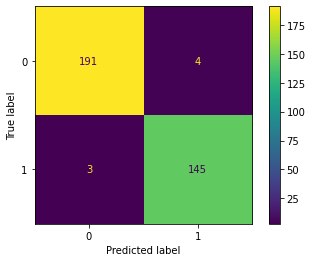

In [65]:
ConfusionMatrixDisplay(cm).plot()

In [66]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [68]:
y_test.value_counts()

0    195
1    148
Name: Class, dtype: int64

In [69]:
# Recall - indivisual class accuracy
# Recall of class 0 : sensitivity of algorithm
r0 = 191/195
r0

0.9794871794871794

In [70]:
# Recall - indivisual class accuracy
# Recall of class 1 : specificity of algorithm
r1 = 145/148
r1

0.9797297297297297

In [71]:
pd.Series(y_pred).value_counts()

0    194
1    149
dtype: int64

In [72]:
# Precision of class-0 is  Positive Predictive Value
p0 = 191/194
p0

0.9845360824742269

In [73]:
# Precision of class-1 is  Negative Predictive Value
p1 = 145/149
p1

0.9731543624161074

In [74]:
# F1 Score / Harmonic mean
f0 = 2 * (p0 * r0) / (p0 + r0)
f0

0.9820051413881747

In [75]:
# F1 Score / Harmonic mean
f1 = 2 * (p1 * r1) / (p1 + r1)
f1

0.9764309764309763

### Visualize the tree

In [77]:
from sklearn.tree import plot_tree

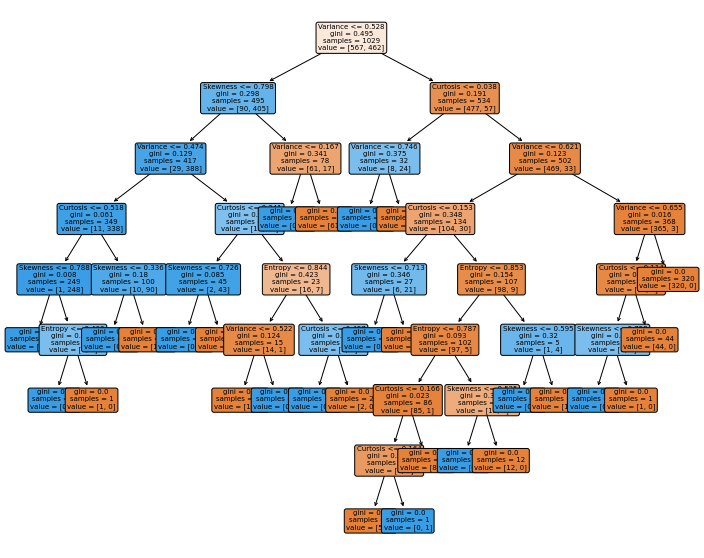

In [83]:
plt.figure(figsize=(12,10))
plot_tree(classifier, fontsize=7, filled=True, rounded=True,
         feature_names=x.columns);
plt.savefig('tree.png')

### Prediction on new data

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
new1 = [[3.86600,-2.63830,1.9242,0.10645]]
new2 = [[-3.75030,-13.45860,17.5932,-2.77710]]

In [90]:
new1 = scaler.transform(new1)
classifier.predict(new1)[0]

0

In [91]:
new1 = scaler.transform(new2)
classifier.predict(new2)[0]

1